Linear Regression MSE: 0.2251670169461551, R2: 0.9860292715048422
Random Forest Regression MSE: 0.013513513513513514, R2: 0.9991615395945931


/var/folders/9y/82y5h_bn1j9d838mpq781tyc0000gn/T/ipykernel_1185/2598506566.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


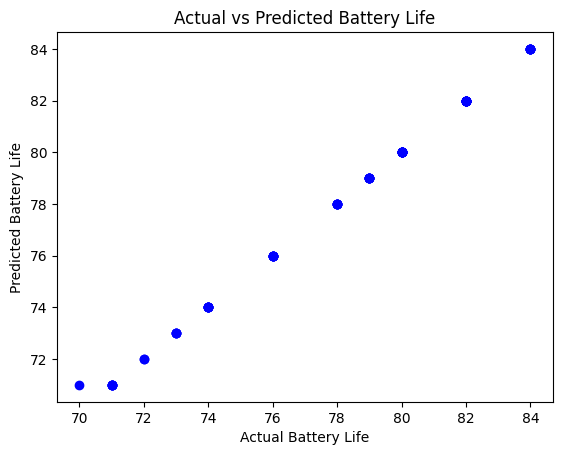

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Collection
# Load your dataset (example.csv should be replaced with your actual dataset file)
data = pd.read_csv('example.csv')

# Step 2: Data Preprocessing
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Feature and target selection
features = data[['temperature', 'charge_cycles', 'discharge_rate']]
target = data['battery_life']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Model Selection and Training
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predictions
linear_pred = linear_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluation Metrics
linear_mse = mean_squared_error(y_test, linear_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

linear_r2 = r2_score(y_test, linear_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Linear Regression MSE: {linear_mse}, R2: {linear_r2}")
print(f"Random Forest Regression MSE: {rf_mse}, R2: {rf_r2}")

# Step 5: Model Deployment (Example: Saving the best model)
import joblib
joblib.dump(rf_model, 'rf_battery_life_model.pkl')

# Step 6: Visualization
plt.scatter(y_test, rf_pred, color='blue')
plt.xlabel('Actual Battery Life')
plt.ylabel('Predicted Battery Life')
plt.title('Actual vs Predicted Battery Life')
plt.show()

In [4]:
print(df.isnull().sum())

temperature       0
charge_cycles     0
discharge_rate    1
battery_life      1
dtype: int64


In [5]:
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

/var/folders/9y/82y5h_bn1j9d838mpq781tyc0000gn/T/ipykernel_1185/1107300252.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [6]:
print(df.dtypes)

temperature         int64
charge_cycles       int64
discharge_rate    float64
battery_life      float64
dtype: object


In [7]:
df = df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values as NaN
df.fillna(0, inplace=True)  # Replace NaNs with 0 (or use another strategy)

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (295, 3)
y_train shape: (295,)


In [9]:
y_train = y_train.values.ravel()  # Convert DataFrame column to 1D array

In [13]:
import numpy as np

print(np.isnan(y_train).sum())  # Check how many NaN values exist

1


In [14]:
mask = ~np.isnan(y_train)  # Create a mask where y_train is not NaN
X_train = X_train[mask]  # Keep only valid rows
y_train = y_train[mask]  # Keep only valid labels

In [15]:
print(np.isnan(y_train).sum())  # Should print 0

0


In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Save the trained model
with open("rf_battery_life_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")

Model saved successfully!


In [19]:
import os
print("Model exists:", os.path.exists("rf_battery_life_model.pkl"))

Model exists: True
